# Income Evaluation - Part 2: Data Visualization and Analysis

## 1. Importing Dataset and Necessary Packages

In [1]:
import matplotlib.pyplot as plt                    # plotting package
import numpy as np                                 # linear algebra4
import os                                          # package used to set work directory
import pandas as pd                                # package used to create dataframes
import re                                          # regular expressions
import seaborn as sns                              # statistic data visualizations

from operator import itemgetter                    # package used for sorted, max, min 
from sklearn.preprocessing import StandardScaler   # package for standardization

In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 2. Visualization and Analysis

There are quantitative and qualitative features. We will first go through them individually and analyze their relation with income. Then, we will look at more complex relationships where multiple features interact.

### 2.1 Quantitative Features

In part 1, we briefly went over the column `fnlwgt` (final weight). We don't know yet how important it will be to take these weights into account. Let's look at the density distribution of `fnlwgt`.

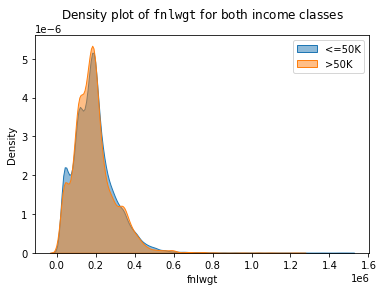

In [5]:
sns.kdeplot(df['fnlwgt'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['fnlwgt'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{fnlwgt}$' + ' for both income classes')
plt.show()

The density distributions for both classes of `income` are very similar. It's an indication that there is no significant relation between `fnlwgt` and `income`. We will not include this column in the data visualization or in any other further analysis (for example, modeling income).

In [6]:
df.drop(['fnlwgt'], axis=1, inplace=True)

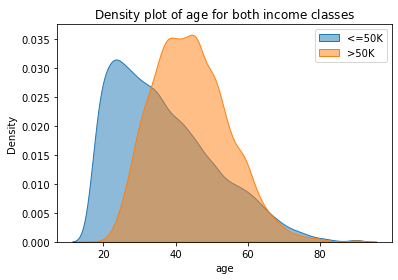

In [7]:
sns.kdeplot(df['age'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['age'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{age}$' + ' for both income classes')
plt.show()

We'll do the same for the other continuous features:
- `education_num`
- `capital_gain`
-  `capital_loss`
- `hours_per_week`

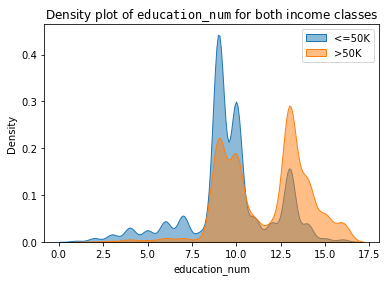

In [8]:
sns.kdeplot(df['education_num'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['education_num'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{education\_num}$' + ' for both income classes')
plt.show()

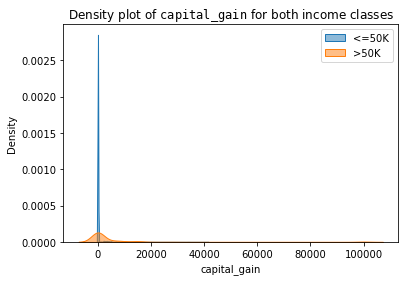

In [9]:
sns.kdeplot(df['capital_gain'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['capital_gain'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{capital\_gain}$' + ' for both income classes')
plt.show()

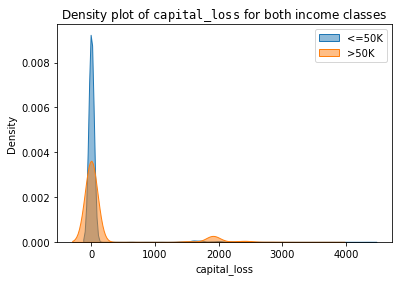

In [10]:
sns.kdeplot(df['capital_loss'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['capital_loss'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{capital\_loss}$' + ' for both income classes')
plt.show()

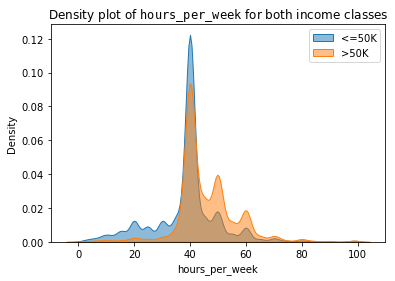

In [11]:
sns.kdeplot(df['hours_per_week'].iloc[np.where(df['income'] == '<=50K')], fill=True, alpha=0.5, label='<=50K')
sns.kdeplot(df['hours_per_week'].iloc[np.where(df['income'] == '>50K')], fill=True, alpha=0.5, label='>50K')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{hours\_per\_week}$' + ' for both income classes')
plt.show()

All these quantitave features show different densities for the two income classes. The lower income class skews to the younger side which makes sense as people's earnings usually increase as they gain experience and skills over time. The higher income class tends to be more formally educated. Both income classes have relatively small capital gains and losses, but the higher income class skews a little more to the right for both as they have more room in their finances to save and invest. Both classes work 40 hours a week in general, but the lower income class skews a little more to the left and the higher income class to the right. Working more hours usually translate to more earnings. This means that all of these features have a significant relation with respect to income and should therefore not be dismissed. We'll now analyze the data further.

### 2.2 Sex

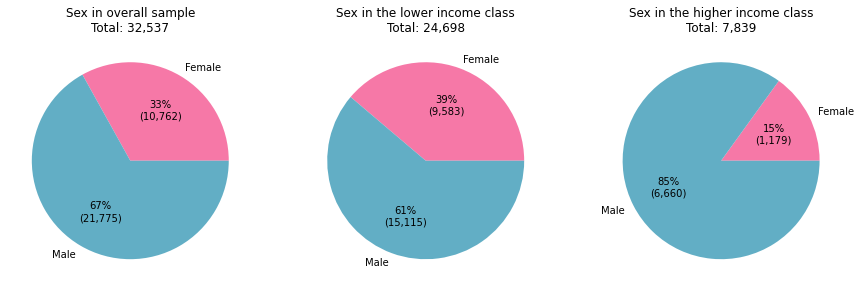

In [12]:
pie_overall = df['sex'].value_counts()[['Female', 'Male']].tolist()

pie_high_income = [
    len(df[(df['sex'] == 'Female') & (df['income'] == '>50K')]),
    len(df[(df['sex'] == 'Male') & (df['income'] == '>50K')])
]

pie_low_income = [
    len(df[(df['sex'] == 'Female') & (df['income'] == '<=50K')]),
    len(df[(df['sex'] == 'Male') & (df['income'] == '<=50K')])
]

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].pie(
    pie_overall,
    labels=['Female', 'Male'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct*sum(pie_overall)/100:,.0f})',
    colors=['#f678a7', '#62aec5']
)
ax[0].set_title(f'Sex in overall sample\nTotal: {sum(pie_overall):,}')

ax[1].pie(
    pie_low_income,
    labels=['Female', 'Male'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct*sum(pie_low_income)/100:,.0f})',
    colors=['#f678a7', '#62aec5']
)
ax[1].set_title(f'Sex in the lower income class\nTotal: {sum(pie_low_income):,}')

ax[2].pie(
    pie_high_income,
    labels=['Female', 'Male'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct*sum(pie_high_income)/100:,.0f})',
    colors=['#f678a7', '#62aec5']
)
ax[2].set_title(f'Sex in the higher income class\nTotal: {sum(pie_high_income):,}')

plt.show()

The share of men in the sample is significantly larger than the share of women. When split into the higher en lower income classes, we see a very similar distribution in the lower class, while the men form an overwhelming majority in the higher income class. It makes sense that the distribution in the lower class is very similar to the overall distribution since the lower income class is much larger than the higher income class.

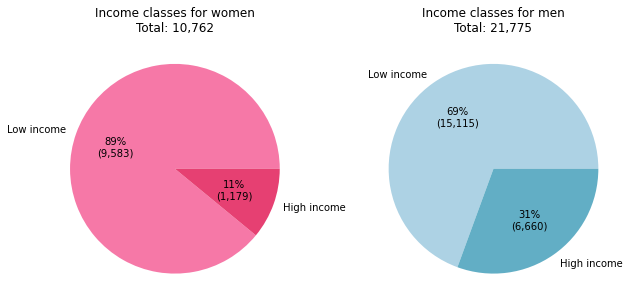

In [13]:
pie_female = [
    len(df[(df['sex'] == 'Female') & (df['income'] == '<=50K')]),
    len(df[(df['sex'] == 'Female') & (df['income'] == '>50K')])
]

pie_male = [
    len(df[(df['sex'] == 'Male') & (df['income'] == '<=50K')]),
    len(df[(df['sex'] == 'Male') & (df['income'] == '>50K')])
]

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

ax[0].pie(
    pie_female,
    labels=['Low income', 'High income'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct*sum(pie_female)/100:,.0f})',
    colors=['#f678a7', '#e64072']
)
ax[0].set_title(f'Income classes for women\nTotal: {sum(pie_female):,}')

ax[1].pie(
    pie_male,
    labels=['Low income', 'High income'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct*sum(pie_male)/100:,.0f})',
    colors=['#add2e4', '#62aec5']
)
ax[1].set_title(f'Income classes for men\nTotal: {sum(pie_male):,}')

plt.tight_layout()
plt.show()


Only 11 percent of the women falls into the higher income class, whereas 31 percent of the men is part of the higher income class.

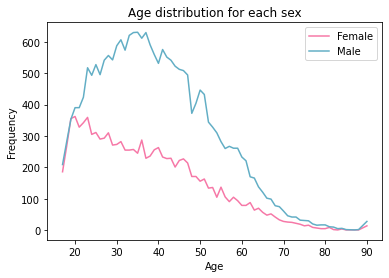

In [14]:
female_age_dist = df.loc[df['sex'] == 'Female', 'age'].value_counts().sort_index()
male_age_dist = df.loc[df['sex'] == 'Male', 'age'].value_counts().sort_index()

plt.plot(female_age_dist.index, female_age_dist.values, color='#f678a7')
plt.plot(male_age_dist.index, male_age_dist.values, color='#62aec5')

plt.legend(['Female', 'Male'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution for each sex')
plt.show()


The female population of the sample skews significantly younger than the male population. This could explain the sigificant differences in income. This is something that should be kept in mind in further analysis.

### 2.3 Education

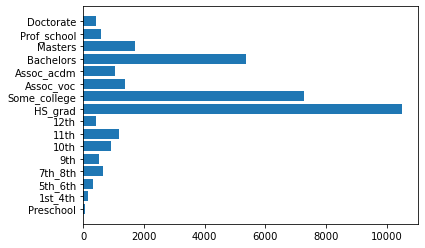

In [15]:
edu_counts = df.groupby('education_num')['education'].first().sort_index()
edu_sorted_num = df['education_num'].value_counts().sort_index()

plt.barh(edu_counts.values, edu_sorted_num.values)
plt.show()

Let's clean this up a bit. We don't really need so many categories for now. We'll join all the people without a high school diploma (or GED) together in one  category. The high school graduates and the ones that have some experience in college but no finished higher education will form one category. The two types of associate's degrees will be categorized together. 

In [16]:
df['education_compact'] = ['']*len(df)
df['education_compact_num'] = ['']*len(df)

levels_compact = ['No degree', 'High school or GED', 'Associate\'s', 'Bachelor\'s', 'Master\'s', 'Professional school', 'Doctorate']

levels_compact_ind = [list(range(9)), [9, 10], [11, 12], [13], [14], [15], [16]]

for i in range(len(levels_compact_ind)):
    inds = [n for n in range(len(df)) if df.loc[n, 'education_num'] in levels_compact_ind[i]]
    df.loc[inds, 'education_compact'] = levels_compact[i]
    df.loc[inds, 'education_compact_num'] = i

We can now split the data set in two with respect to income class and visualize the distribution of the education levels.

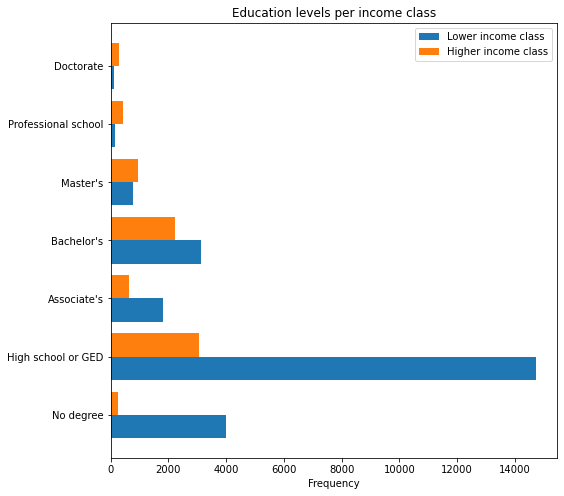

In [17]:
edu_income_counts = df.groupby(['education_compact_num', 'income']).size().unstack(fill_value=0)
edu_counts_compact_low = edu_income_counts['<=50K'].reindex(range(len(levels_compact)), fill_value=0).tolist()
edu_counts_compact_high = edu_income_counts['>50K'].reindex(range(len(levels_compact)), fill_value=0).tolist()

y = np.arange(len(levels_compact))
bar_width = 0.4

plt.figure(figsize=(8, 8))
plt.barh(y - bar_width/2, edu_counts_compact_low, height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, edu_counts_compact_high, height=bar_width, label='Higher income class')
plt.yticks(y, levels_compact)
plt.xlabel('Frequency')
plt.title('Education levels per income class')
plt.legend()
plt.show()

As one would expect in today's society, the large majority of the lower class has not finished any formal education beyond high school. You'll not find many high income earners that have no degree at all. It may not be as clear in the bar chart, but if you look at the pie chart below, you'll see that more than half of the higher income class has a degree beyond high school.

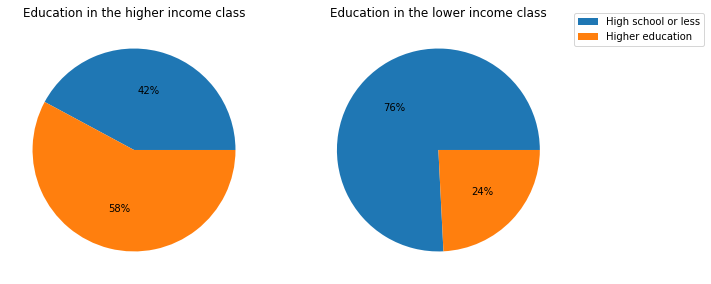

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))

ax[0].pie([sum(edu_counts_compact_high[:2]), sum(edu_counts_compact_high[2:])], autopct='%1.f%%')
ax[0].set_title('Education in the higher income class')

ax[1].pie([sum(edu_counts_compact_low[:2]), sum(edu_counts_compact_low[2:])], autopct='%1.f%%')
ax[1].set_title('Education in the lower income class')

fig.legend(labels=['High school or less', 'Higher education'], loc='upper right', bbox_to_anchor=(1.1, 0.7))
plt.show()

Earlier we noticed that the female population skews significantly younger than the male population which naturally affects the makeup of the income classes with respect to sex. One would expect the age differences to affect the education levels as well since people tend to graduate from their master's or doctorate at a later stage in life.

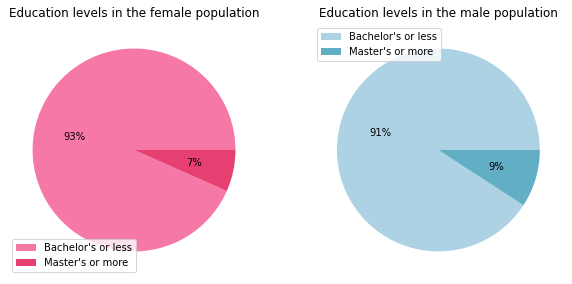

In [19]:
female_master_more = sum((df['sex'] == 'Female') & (df['education_num'] <= 13))
female_bachelor_less = sum((df['sex'] == 'Female') & (df['education_num'] > 13))

male_master_more = sum((df['sex'] == 'Male') & (df['education_num'] <= 13))
male_bachelor_less = sum((df['sex'] == 'Male') & (df['education_num'] > 13))

fig, ax = plt.subplots(1, 2, figsize=(10,10))

ax[0].pie([female_master_more, female_bachelor_less], autopct='%1.f%%', colors=['#f678a7', '#e64072'])
ax[0].set_title('Education levels in the female population')
ax[0].legend(labels=['Bachelor\'s or less', 'Master\'s or more'])

ax[1].pie([male_master_more, male_bachelor_less], autopct='%1.f%%', colors=['#add2e4', '#62aec5'])
ax[1].set_title('Education levels in the male population')
ax[1].legend(labels=['Bachelor\'s or less', 'Master\'s or more'])

plt.show()

It's intersting to see that even though the female population skews significantly younger, proportionally, the share of people who have a master's degree or higher is about the same for both sexes.

### 2.4 Ethnicity and Nationality

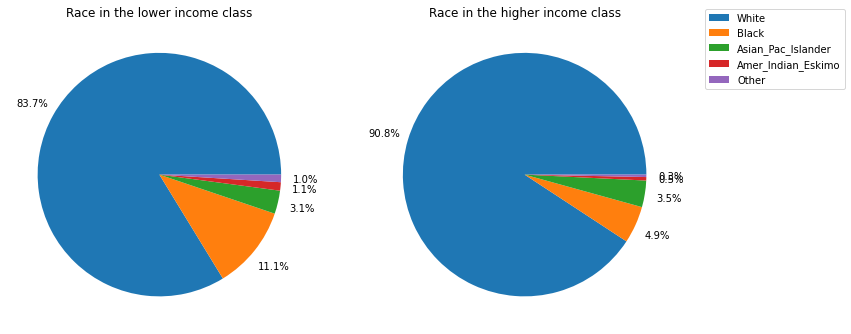

In [20]:
race_high = df.loc[df['income'] == '>50K', 'race'].value_counts()
race_low = df.loc[df['income'] == '<=50K', 'race'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12,12))

ax[0].pie(race_low, autopct='%1.1f%%', pctdistance=1.2)
ax[0].set_title('Race in the lower income class')

ax[1].pie(race_high, autopct='%1.1f%%', pctdistance=1.2)
ax[1].set_title('Race in the higher income class')

fig.legend(labels=race_high.index, loc='upper right', bbox_to_anchor=(1.1, 0.7))
plt.show()

For both classes, an overwhelming majority is white. The black population's share is twice as large in the lower income class as it is in the higher income class. The same is true for the Asian/Pacific Islander population. For the 'Other' category, this is about thrice as large. There's another column that may be correlated with `race`, namely, `native_country`.

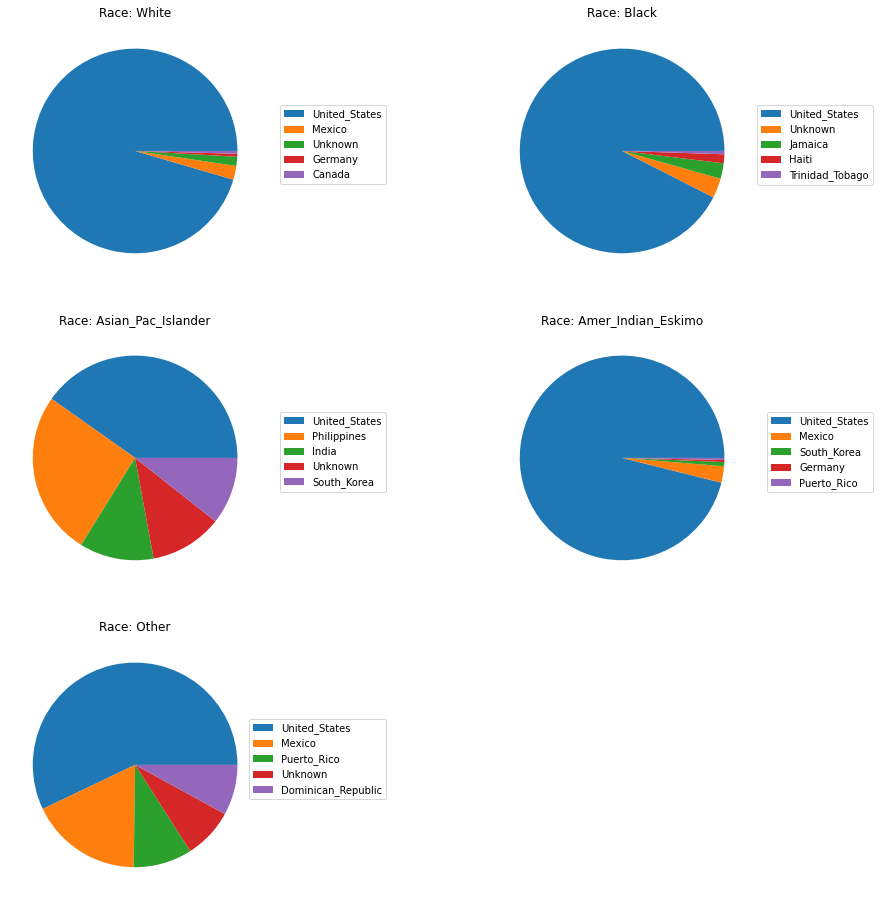

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))

race_labels = df['race'].unique()

for i, race in enumerate(race_labels):
    top_countries = df.loc[df['race'] == race, 'native_country'].value_counts().head(5)
    ax[i//2, i%2].pie(top_countries.values)
    ax[i//2, i%2].set_title(f'Race: {race}')
    ax[i//2, i%2].legend(labels=top_countries.index, loc='upper right', bbox_to_anchor=(1.5, 0.7))

ax.flat[5].axis('off')

plt.show()

For each race, we've extracted the top 5 native countries and visualized it in pie charts. For the races *White*, *Black* and *Native American*, the overwhelming majority of the people comes from the US or and the rest mostly comes from another North American country. For the *Asian/Pacific Islander* category, most people in this category either comes from the US or from an Asian country. From the *'Other'* category, the majority is from the US and the rest is mostly from other countries in North America and the Caribbeans. Since such a large share of the overall sample is from the US and race of people who are not from the US is quite correlated to their race, we will create a new column named `us` which will be a dummy that equals 1 if the person is from the US and zero otherwise.

In [22]:
df['us'] = [1 if country == 'United_States' else 0 for country in df['native_country']]

In [23]:
print(f'{100*sum(df['us'])/len(df):1.1f}% of the sample comes from the US.')

89.6% of the sample comes from the US.


Before we move on, let's see if there are other countries whose population sizes differ significantly among the income classes.

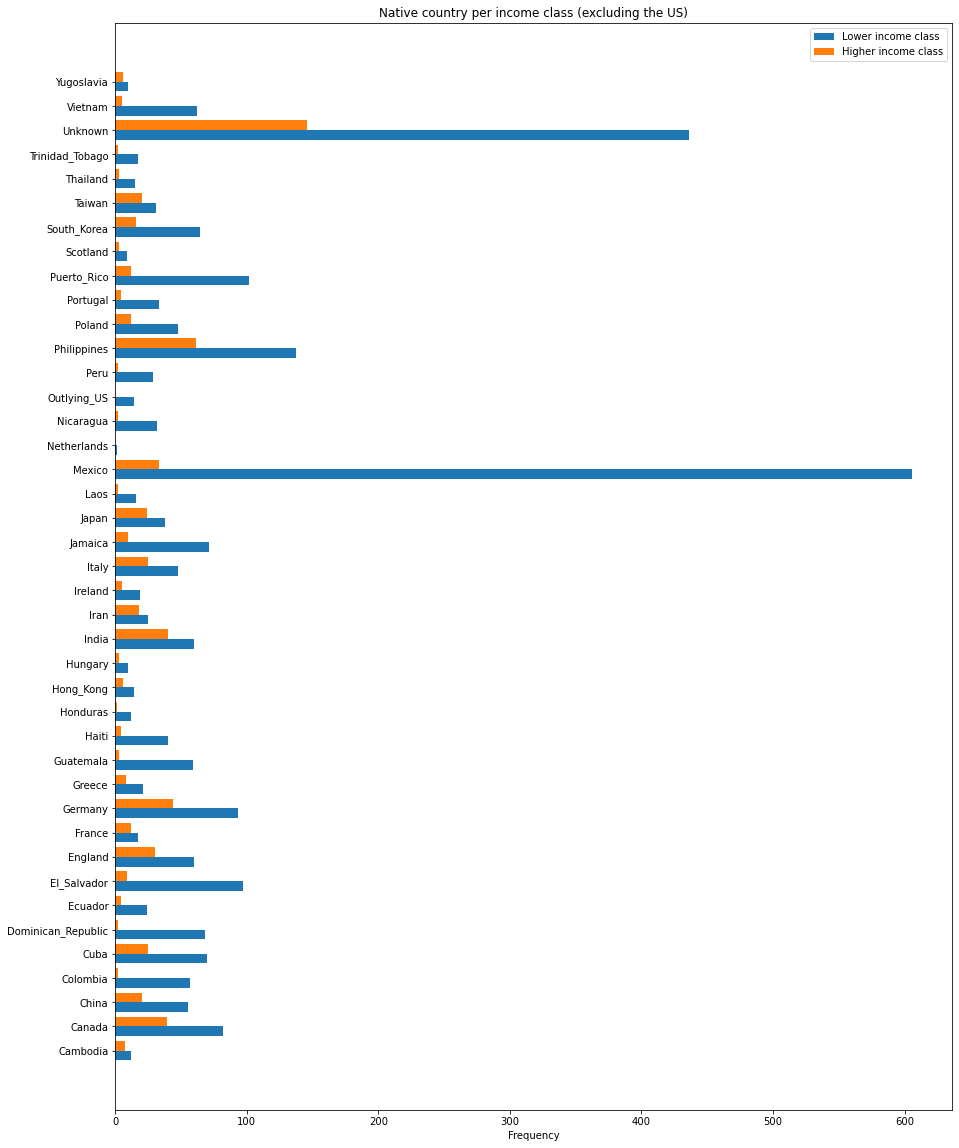

In [24]:
country_labels = sorted(set(df['native_country']))

country_low = df[df['income'] == '<=50K']['native_country'].value_counts()
country_high = df[df['income'] == '>50K']['native_country'].value_counts()

all_labels = set(country_labels)
country_low_labels = country_low.reindex(all_labels, fill_value=0)
country_high_labels = country_high.reindex(all_labels, fill_value=0)

country_labels.remove('United_States')
country_low_sorted = country_low_labels.drop('United_States').sort_index()
country_high_sorted = country_high_labels.drop('United_States').sort_index()

y = np.arange(len(country_labels))
bar_width = 0.4

plt.figure(figsize=(15, 20))
plt.barh(y - bar_width/2, country_low_sorted, height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, country_high_sorted, height=bar_width, label='Higher income class')
plt.yticks(y, country_labels)
plt.xlabel('Frequency')
plt.title('Native country per income class (excluding the US)')
plt.legend()
plt.show()

It looks like there are significant differences in the makeup of the two income classes when it comes to people's immigrant background. Especially countries like Mexico, the Philippines, (former) Yugoslavia, Taiwan, Nicaragua, Guatemala, France, Colombia and Cambodia skew very heavily to one of the two income classes.

### 2.5 Employment and Careers

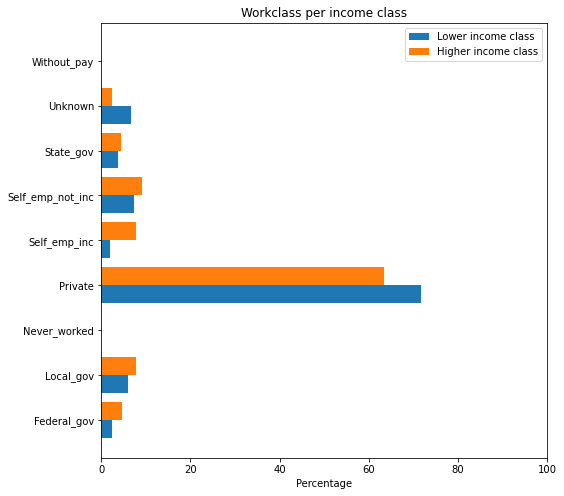

In [25]:
def get_sorted_workclass_data(df, income_class, workclass_labels):
    workclass_data = df.loc[df['income'] == income_class, 'workclass'].value_counts()
    workclass_labels_missing = set(workclass_labels) - set(workclass_data.index)
    if workclass_labels_missing:
        missing_data = pd.Series([0] * len(workclass_labels_missing), index=workclass_labels_missing)
        workclass_data = pd.concat([workclass_data, missing_data])
    return [workclass_data[label] for label in sorted(workclass_labels)]

workclass_labels = list(set(df['workclass']))

wc_high = get_sorted_workclass_data(df, '>50K', workclass_labels)
wc_low = get_sorted_workclass_data(df, '<=50K', workclass_labels)

y = np.arange(len(workclass_labels))
bar_width = 0.4

plt.figure(figsize=(8,8))
plt.barh(y - bar_width/2, (100 * np.array(wc_low) / sum(wc_low)), height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, (100 * np.array(wc_high) / sum(wc_high)), height=bar_width, label='Higher income class')
plt.yticks(y, sorted(workclass_labels))
plt.xlabel('Percentage')
plt.title('Workclass per income class')
plt.xlim((0, 100))
plt.legend()
plt.show()

Overall, the majority works in the private sector for a employee. However, relatively, more higher income earners work for the government than lower income earners. Same holds for self employment, especially when their business is incorporated. There is one category which is not defined that contains more lower income earners relatively.

Now let's look at the actual jobs.

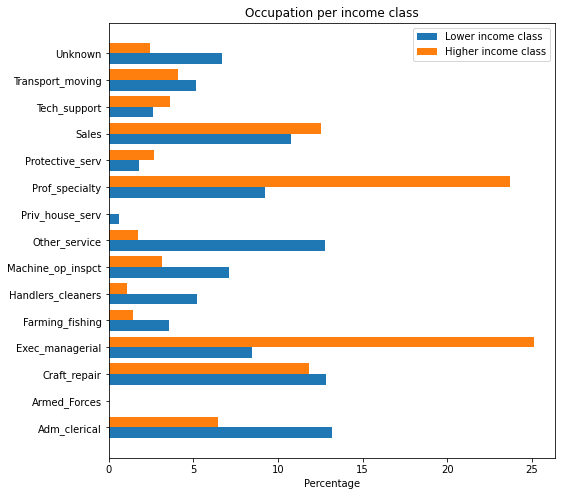

In [26]:
occupation_labels = list(set(df['occupation']))

def get_sorted_occupation_data(income_class):
    occupation_data = df.loc[df['income'] == income_class, 'occupation'].value_counts()
    missing_cats = set(occupation_labels) - set(occupation_data.index)
    if missing_cats:
        occupation_data = pd.concat([occupation_data, pd.Series([0] * len(missing_cats), index=missing_cats)])
    return [occupation_data[label] for label in sorted(occupation_labels)]

wc_high = get_sorted_occupation_data('>50K')
wc_low = get_sorted_occupation_data('<=50K')

y = np.arange(len(occupation_labels))
bar_width = 0.4

plt.figure(figsize=(8,8))
plt.barh(y - bar_width/2, (100 * np.array(wc_low) / sum(wc_low)), height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, (100 * np.array(wc_high) / sum(wc_high)), height=bar_width, label='Higher income class')
plt.yticks(y, sorted(occupation_labels))
plt.xlabel('Percentage')
plt.title('Occupation per income class')
plt.legend()
plt.show()

The physical jobs are more common in the lower income class. Jobs that require education and/or experience are more common in the higher income class.

### 2.6 Living Situation and Marital Status

There are two columns: `relationship` and `marital_status`. At first sight, these two seem to be quite related to each other. We'll take a deeper look at this.

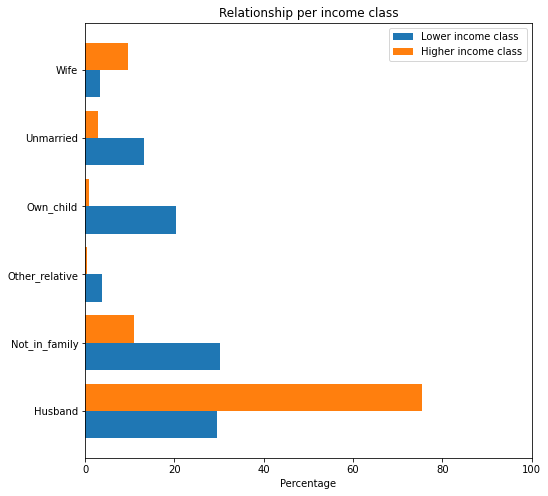

In [27]:
relationship_labels = sorted(set(df['relationship']))

def get_relationship_data(income_class):
    relationship_data = df.loc[df['income'] == income_class, 'relationship'].value_counts()
    return [relationship_data.get(label, 0) for label in relationship_labels]

relationship_high_data = get_relationship_data('>50K')
relationship_low_data = get_relationship_data('<=50K')

y = np.arange(len(relationship_labels))
bar_width = 0.4

plt.figure(figsize=(8,8))
plt.barh(y - bar_width/2, (100 * np.array(relationship_low_data) / sum(relationship_low_data)), height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, (100 * np.array(relationship_high_data) / sum(relationship_high_data)), height=bar_width, label='Higher income class')
plt.yticks(y, relationship_labels)
plt.xlabel('Percentage')
plt.title('Relationship per income class')
plt.xlim((0,100))
plt.legend()
plt.show()


The `relationship` feature describes the person's role in the household they live in. *Wife* and *Husband* are self-explanatory. *Own_child* means they live with their parents. *Other_relative* means they live with another relative which could be an uncle, aunt or any other relative. *Not_in_family* means that they live with someone who is not directly related to them, like a roommate or friend. It's not really clear what *Unmarried* means exactly in this data set, since anyone who isn't a wife or husband is unmarried. We assume that this is a category for people who either live alone or with a partner they are not married to. As can be seen, married people are more likely to be in the higher income class. This makes sense as people usually marry when they are in a stable place and ready to settle down. Also, when two people share a household and responsibilities, there is more room for progression in their career as they share the burden of the responsibilities. Married people also are more likely to be older than unmarried people and we already saw that older people are more likely to be in the higher income class.

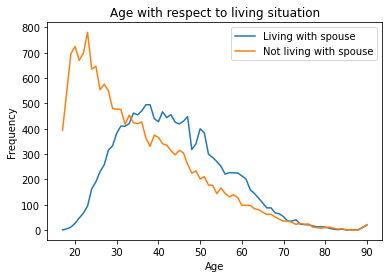

In [28]:
def get_age_freq(relationship_filter):
    age_data = df.loc[relationship_filter, 'age'].value_counts()
    return sorted(age_data.items())

ages_married, freqs_married = zip(*get_age_freq(df['relationship'].isin(['Husband', 'Wife'])))
ages_unmarried, freqs_unmarried = zip(*get_age_freq(~df['relationship'].isin(['Husband', 'Wife'])))

plt.plot(ages_married, freqs_married)
plt.plot(ages_unmarried, freqs_unmarried)
plt.legend(['Living with spouse', 'Not living with spouse'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age with respect to living situation')
plt.show()

As expected, the category of people who are not living with a spouse skews significantly younger compared to those who do live with a spouse. Now we'll look at `marital_status`.

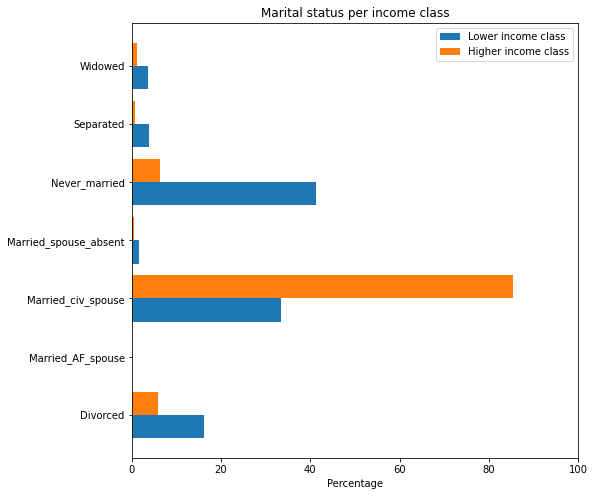

In [29]:
marital_status_labels = list(set(df['marital_status']))

def get_sorted_status_data(income_class):
    status_data = df.loc[df['income'] == income_class, 'marital_status'].value_counts()
    missing_cats = set(marital_status_labels) - set(status_data.index)
    if missing_cats:
        status_data = pd.concat([status_data, pd.Series([0] * len(missing_cats), index=missing_cats)])
    return [status_data[label] for label in sorted(marital_status_labels)]

marital_status_high_data = get_sorted_status_data('>50K')
marital_status_low_data = get_sorted_status_data('<=50K')

y = np.arange(len(marital_status_labels))
bar_width = 0.4

plt.figure(figsize=(8,8))
plt.barh(y - bar_width/2, (100 * np.array(marital_status_low_data) / sum(marital_status_low_data)), height=bar_width, label='Lower income class')
plt.barh(y + bar_width/2, (100 * np.array(marital_status_high_data) / sum(marital_status_high_data)), height=bar_width, label='Higher income class')
plt.yticks(y, sorted(marital_status_labels))
plt.xlabel('Percentage')
plt.title('Marital status per income class')
plt.xlim((0,100))
plt.legend()
plt.show()

*Married_civ_spouse* and *Married_AF_spouse* stand for *Married with civilian spouse* and *Married with Armed Forces spouse*, respectively. *Married_spouse_absent* describes all people who are officially married, but don't live together. This could for example be due to the job of the spouse or because of unconventional living arrangements. *Separated* means that a person is officially separated from their (former) spouse, but still legally married due to for example still being in the process of divorcing their (former) spouse. The other categories are self-explanatory. As we saw in the other chart, married people tend to be higher earners than unmarried people. Therefore, to reduce the number of features for our classification model, we'll create a new binary column that only records whether someone is married or not. We'll use `relationship` and label *Wife* and *Husband* as married and all other cases as unmarried as they are actually living with their spouse.

In [30]:
df['married'] = [1 if person in ['Wife', 'Husband'] else 0 for person in df['relationship']]

contingency_table = pd.crosstab(df['married'], df['income'], rownames=[''], colnames=[''], margins=True)
contingency_table = contingency_table.rename(index={0: 'unmarried', 1: 'married'}, columns={'<=50K': 'low income', '>50K': 'high income'})

print('Contingency table:')
contingency_table

Contingency table:


,low income,high income,All
,,,
unmarried,16604,1178,17782
married,8094,6661,14755
All,24698,7839,32537


## 3. Summary

Since `fnlwgt` seems to have no effect on income, this will be the only feature that is completely excluded from further analysis. The other quantitative features did show distinct patterns between the lower and higher income class.

Men make up a significantly larger portion of the higher income class. The lower income class has a more similar gender distribution to the overall sample, which is larger than the higher income class. Only 11% of women belong to the higher income class, while 31% of men are in that class. The female sample is also notably younger, which may explain the income disparities. Most individuals in the lower income class have not pursued education beyond high school, while the higher income class has more individuals with higher degrees. Despite the younger age of women, the proportion of people with a master's degree or higher is similar across both genders. 

A majority of both income classes is white, with larger shares of Black and Asian/Pacific Islander populations in the lower income class. The 'Other' category is three times larger in the lower income class. A new `us` column is created to distinguish US residents (89.6% of the sample). Significant differences in immigrant background are seen in countries like Mexico, the Philippines, and others, correlating with income class. Most people work in the private sector, but relatively more higher-income earners work in government or are self-employed, especially with incorporated businesses. Physical jobs are more common in the lower income class, while jobs requiring education or experience are more common in the higher income class.

The `relationship` feature indicates a person’s role in their household, such as wife, husband, or living with a parent. Married people are more likely to be in the higher income class, which is expected as they often have more stability and share household responsibilities. A new binary column has been created to label people as married or unmarried based on their living situation, simplifying the data for future analysis.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32537 non-null  int64 
 1   workclass              32537 non-null  object
 2   education              32537 non-null  object
 3   education_num          32537 non-null  int64 
 4   marital_status         32537 non-null  object
 5   occupation             32537 non-null  object
 6   relationship           32537 non-null  object
 7   race                   32537 non-null  object
 8   sex                    32537 non-null  object
 9   capital_gain           32537 non-null  int64 
 10  capital_loss           32537 non-null  int64 
 11  hours_per_week         32537 non-null  int64 
 12  native_country         32537 non-null  object
 13  income                 32537 non-null  object
 14  education_compact      32537 non-null  object
 15  education_compact_n

We will export the manipulated dataset for future use.

In [32]:
df.to_csv('dataset_after_eda.csv', index=False)